# 1.反向传播算法为什么要“反向”

从一道编程题说起

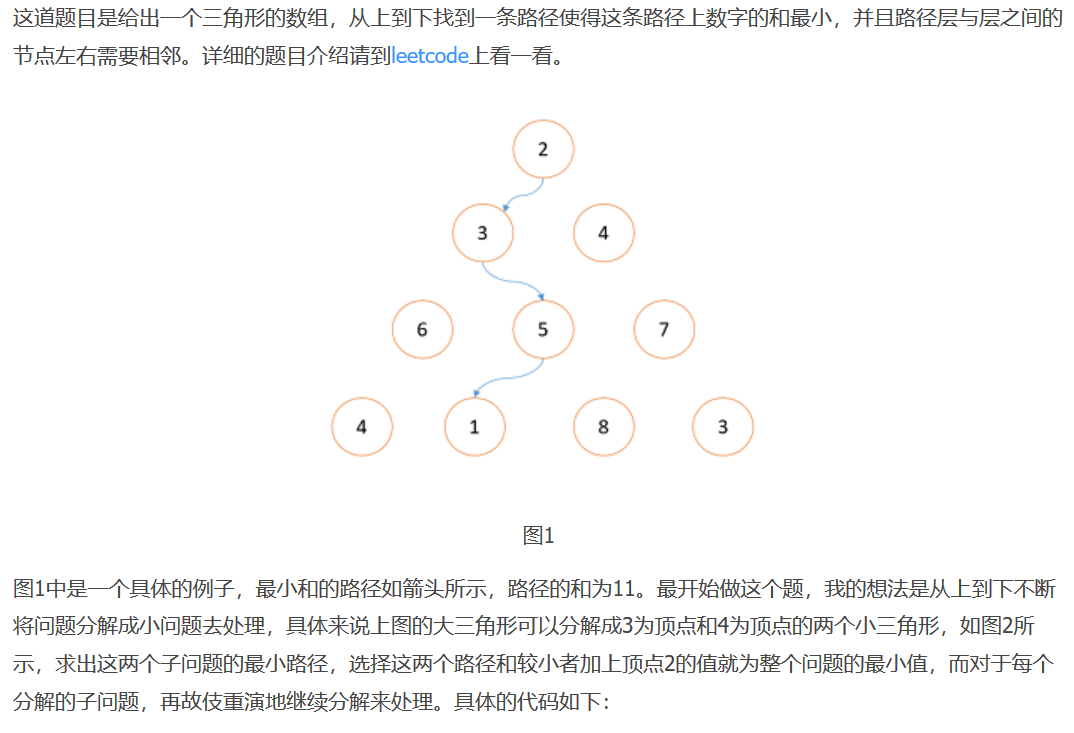

In [ ]:
class Solution:
    def minPoint(self,triangel,i,j):
        if i == len(triangel)-1:       #最底层，递归基
            return triangel[i][j]
        else:
            return triangel[i][j] +  \   #顶点值
            min(self.minPoint(triangel,i+1,j),self.minPoint(triangel,i+1,j+1)) #子问题的较小者
    def minimumTotal(self, triangle):
        """
        :type triangle: List[List[int]]
        :rtype: int
        """
        return self.minPoint(triangle,0,0)

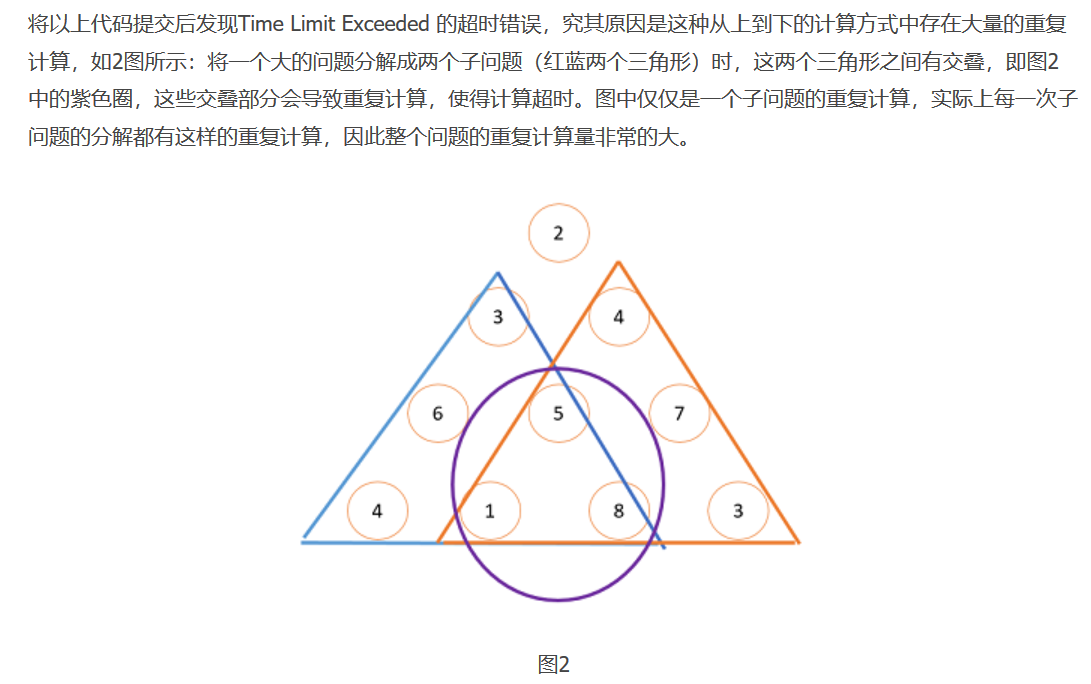

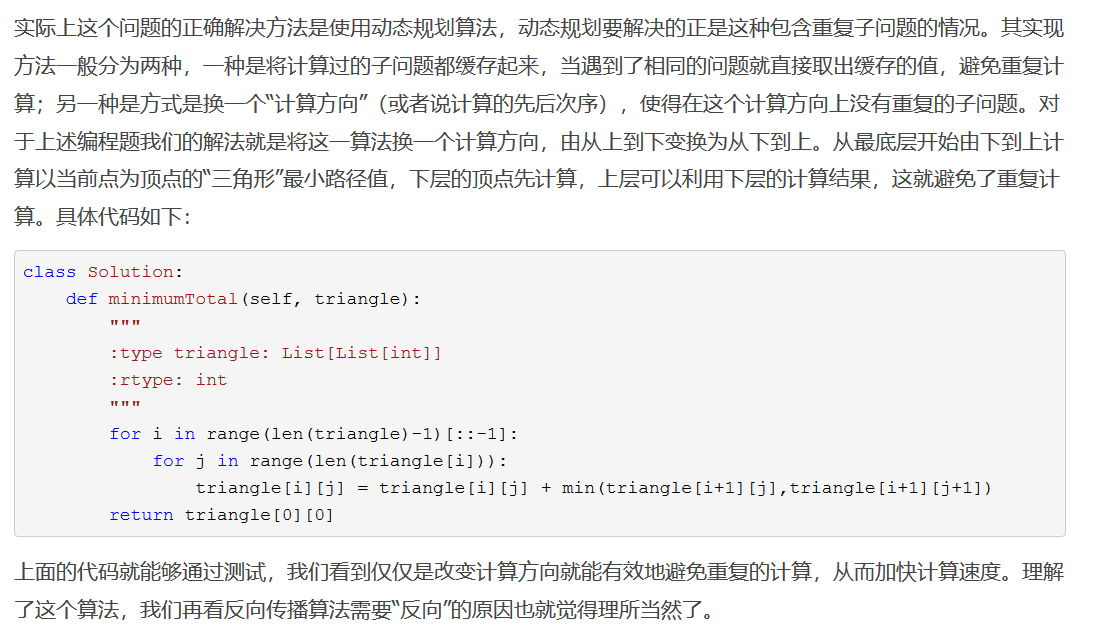

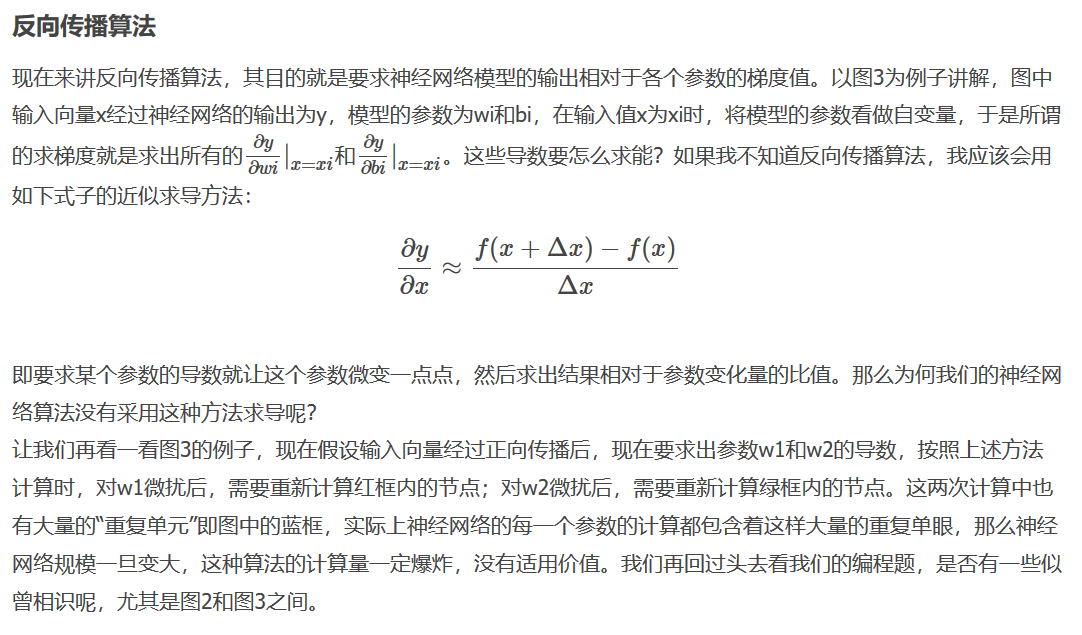

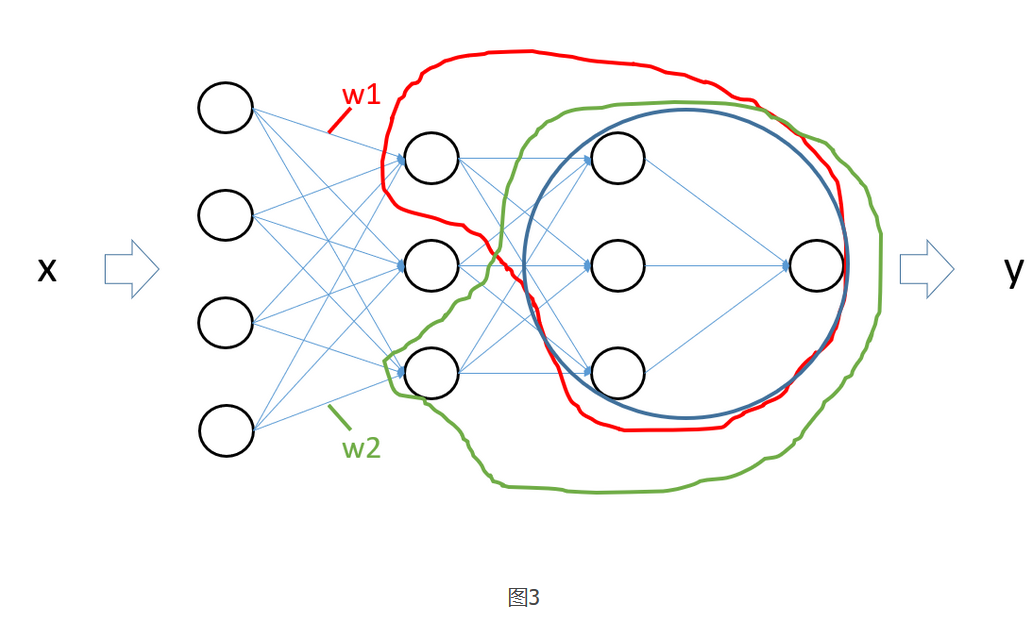

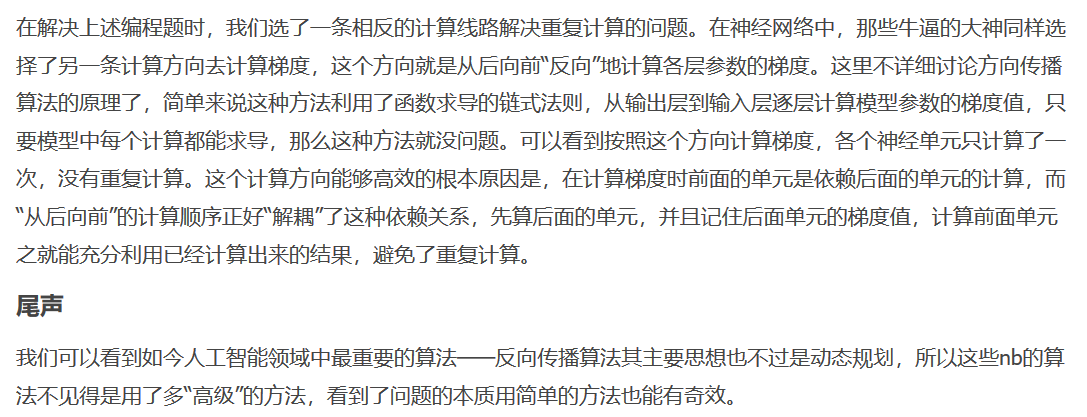

反向传播算法最初在 1970 年代被提及，但是人们直到 David Rumelhart、Geoffrey Hinton 和 Ronald Williams 的著名的 1986 年的论文中才认识到这个算法的重要性。

反向传播的核心是一个对代价函数 关于任何权重 和 偏置 的偏导数 的表达式。

这个表达式告诉我们在改变权重和偏置时，代价函数变化的快慢。
关于代价函数的两个假设

    代价函数可以被写成在每一个训练样本 上的代价函数 的均值 。

    代价函数可以写成神经网络输出的函数。

需要假设1的原因是，反向传播实际上是对一个独立的训练样本计算了 和 。然后通过在所有训练样本上进行平均化获得 和 。

需要假设2的原因是，要把代价函数与神经网络输出联系起来，进而与神经网络的参数联系起来

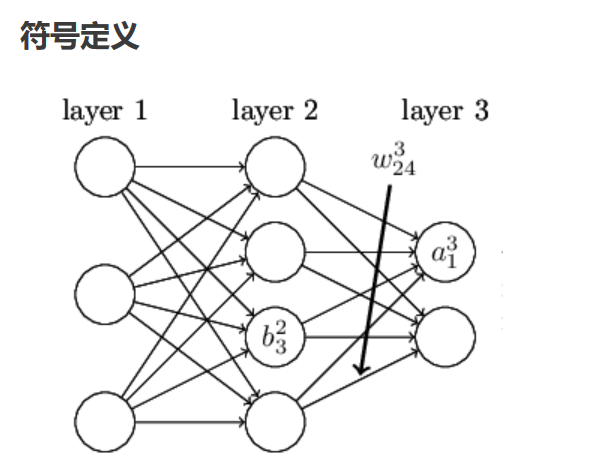

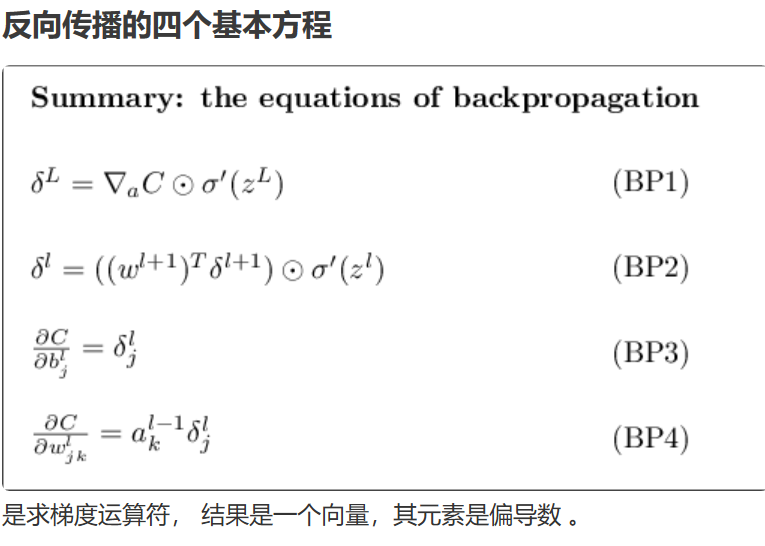

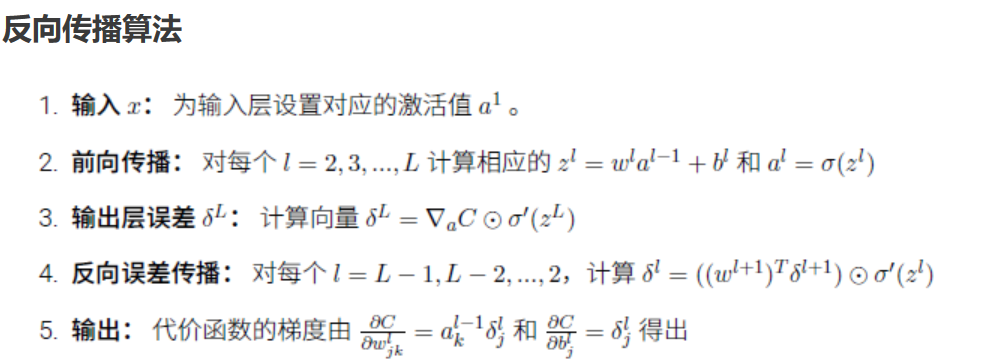

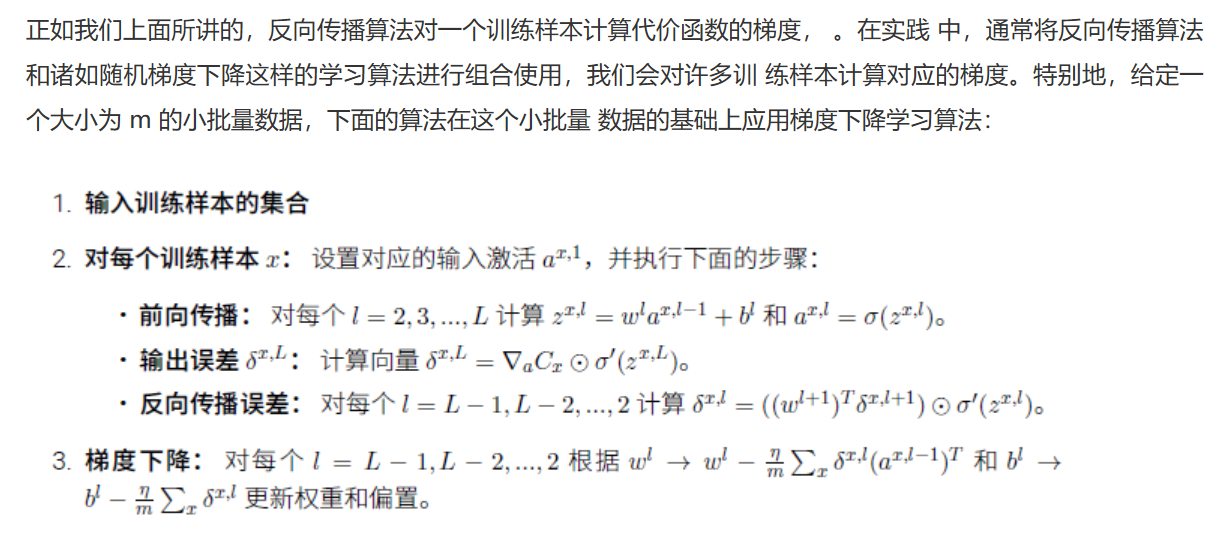

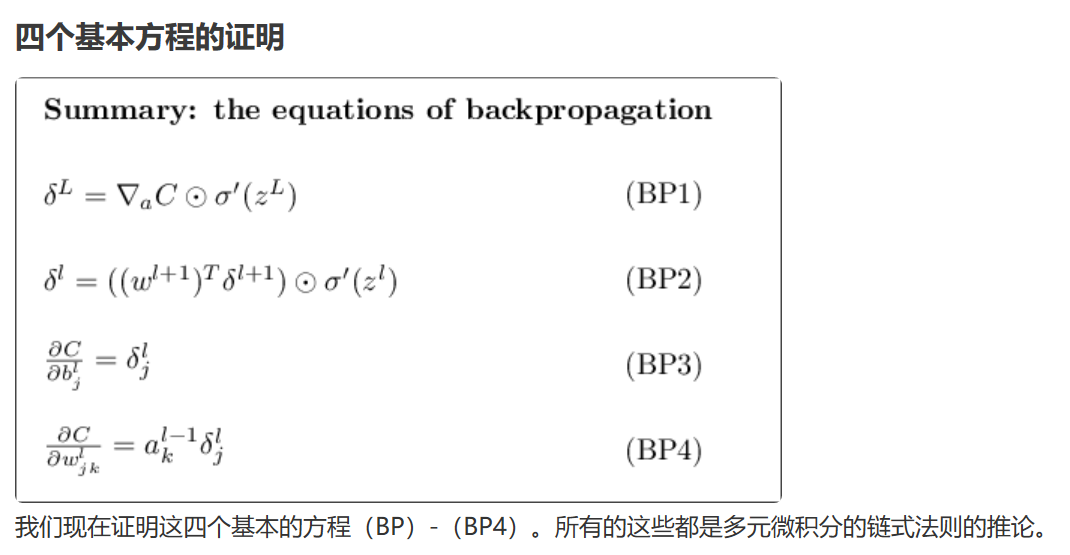

其实最早的证明的出现也不是太过神秘的事情。因为那只是对简化证明的艰辛工作的积累！

# 反向传播与小批量梯度下降算法结合的一个代码示例

In [ ]:
def backprop(self, x, y):
        """Return a tuple ``(nabla_b, nabla_w)`` representing the
        gradient for the cost function C_x.  ``nabla_b`` and
        ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
        to ``self.biases`` and ``self.weights``."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * 
            sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book.  Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on.  It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)

In [ ]:
def cost_derivative(self, output_activations, y):
        """Return the vector of partial derivatives partial C_x /
        partial a for the output activations."""
        return (output_activations-y)

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

# 反向传播算法实战


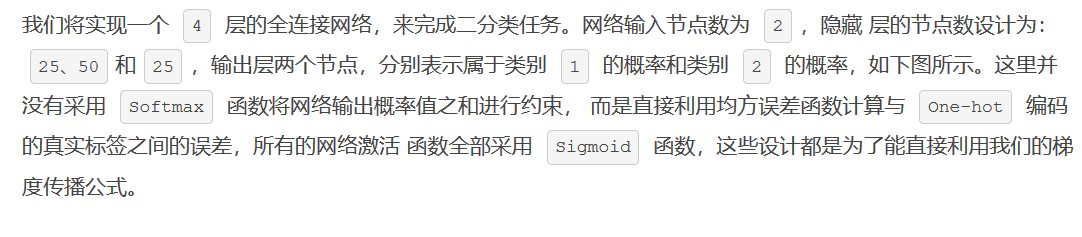

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

# 1.准备数据

In [ ]:
X,y=datasets.make_moons(n_samples=1000,noise=0.2,random_state=100)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print(X.shape,y.shape)

In [ ]:
def make_plot(X,y,plot_name):
    plt.figure(figsize=(12,8))
    plt.title(plot_name,fontsize=30)
    plt.scatter(X[y==0,0],X[y==0,11])
    plt.scatter(X[y==1,0],X[y==1,1])

In [ ]:
make_plot(X,y,"Classification Dataset Visualization")

# 2.网络层

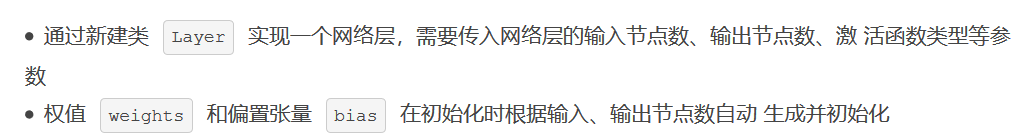

In [ ]:
class Layer:
    #全链接网络层
    def __init__(self,n_input,n_output,)